## In this file, I would prepare data from Bakery.csv for model creation 

In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [74]:
data = pd.read_csv("Bakery.csv")
data.head(2)

,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,month,day,day_of_week,time,part_of_day
0,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,3.00,January,1,Sunday,7,morning
1,1,5,Lower Manhattan,79,3.75,Bakery,Scone,Jumbo Savory Scone,3.75,January,1,Sunday,7,morning


In [75]:
#Obviously drop time column, as we would use part_of_day as parameter. 
#Product id, store id and transaction qty also can be dropped
data = data.drop(["store_id", "product_id", "time"], axis= 1)

In [76]:
data.columns

Index(['transaction_qty', 'store_location', 'unit_price', 'product_category',
       'product_type', 'product_detail', 'revenue', 'month', 'day',
       'day_of_week', 'part_of_day'],
      dtype='object')

In [77]:
#Encoding categorical data 
from sklearn.preprocessing import OneHotEncoder


In [78]:
enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
enc_stores = enc.fit_transform(data[["store_location"]])
data = pd.concat([data, enc_stores], axis = 1).drop(["store_location"], axis = 1)
data = data.drop("store_location_Lower Manhattan", axis = 1)
data.columns

Index(['transaction_qty', 'unit_price', 'product_category', 'product_type',
       'product_detail', 'revenue', 'month', 'day', 'day_of_week',
       'part_of_day', 'store_location_Astoria',
       'store_location_Hell's Kitchen'],
      dtype='object')

In [79]:
enc_month = enc.fit_transform(data[["month"]])
data = pd.concat([data, enc_month], axis = 1).drop(["month"], axis = 1)
data = data.drop("month_May", axis = 1)
data.columns


Index(['transaction_qty', 'unit_price', 'product_category', 'product_type',
       'product_detail', 'revenue', 'day', 'day_of_week', 'part_of_day',
       'store_location_Astoria', 'store_location_Hell's Kitchen',
       'month_April', 'month_February', 'month_January', 'month_June',
       'month_March'],
      dtype='object')

In [80]:
enc_part_of_day = enc.fit_transform(data[["part_of_day"]])
data = pd.concat([data, enc_part_of_day], axis = 1).drop(["part_of_day"], axis = 1)
data = data.drop("part_of_day_evening", axis = 1)
data.columns

Index(['transaction_qty', 'unit_price', 'product_category', 'product_type',
       'product_detail', 'revenue', 'day', 'day_of_week',
       'store_location_Astoria', 'store_location_Hell's Kitchen',
       'month_April', 'month_February', 'month_January', 'month_June',
       'month_March', 'part_of_day_lunch', 'part_of_day_morning'],
      dtype='object')

In [81]:
enc_day_of_week = enc.fit_transform(data[["day_of_week"]])
data = pd.concat([data, enc_day_of_week], axis = 1).drop(["day_of_week"], axis = 1)
data = data.drop("day_of_week_Sunday", axis = 1)
data.columns

Index(['transaction_qty', 'unit_price', 'product_category', 'product_type',
       'product_detail', 'revenue', 'day', 'store_location_Astoria',
       'store_location_Hell's Kitchen', 'month_April', 'month_February',
       'month_January', 'month_June', 'month_March', 'part_of_day_lunch',
       'part_of_day_morning', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object')

In [82]:
data.head(2)

,transaction_qty,unit_price,product_category,product_type,product_detail,revenue,day,store_location_Astoria,store_location_Hell's Kitchen,month_April,...,month_June,month_March,part_of_day_lunch,part_of_day_morning,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1,3.00,Bakery,Scone,Oatmeal Scone,3.00,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3.75,Bakery,Scone,Jumbo Savory Scone,3.75,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
products = []
for product in data["product_detail"].unique():
    products.append(product)

print(products)


['Oatmeal Scone', 'Jumbo Savory Scone', 'Hazelnut Biscotti', 'Chocolate Chip Biscotti', 'Chocolate Croissant', 'Scottish Cream Scone ', 'Ginger Biscotti', 'Ginger Scone', 'Cranberry Scone', 'Almond Croissant', 'Croissant']


I will build 2 models, one based on the income to estimate the revenue for each day. Second model will be predicting the quantity, as we can optimize production and decrease waste of products, 
beacuse most of the bakery is fresh and could be sold within one day only. 

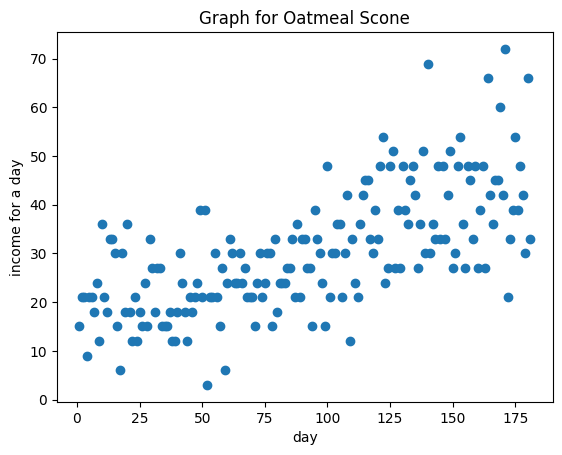

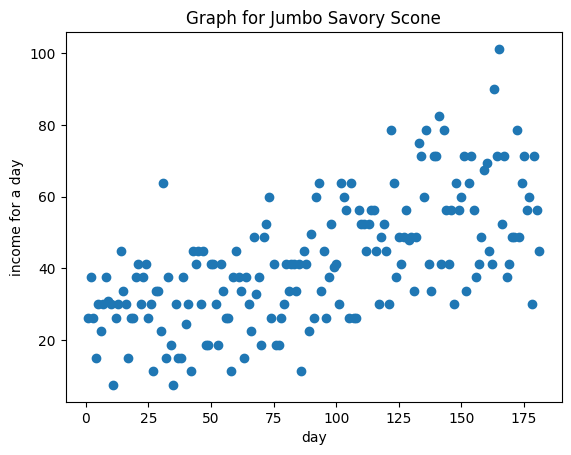

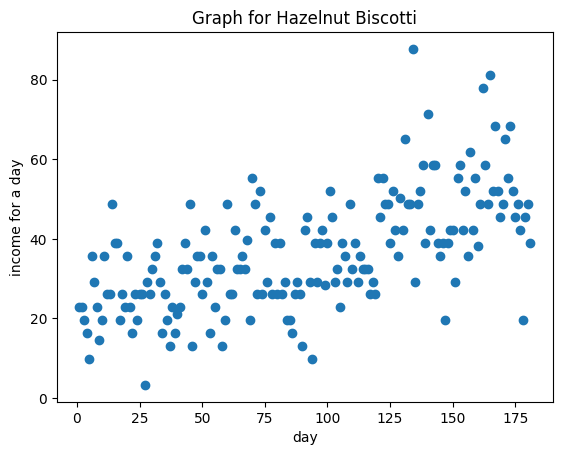

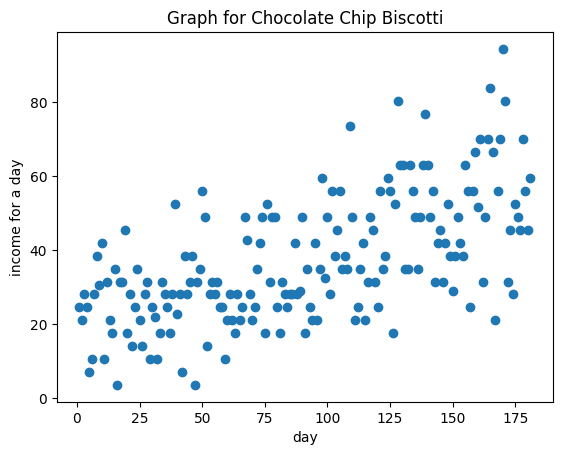

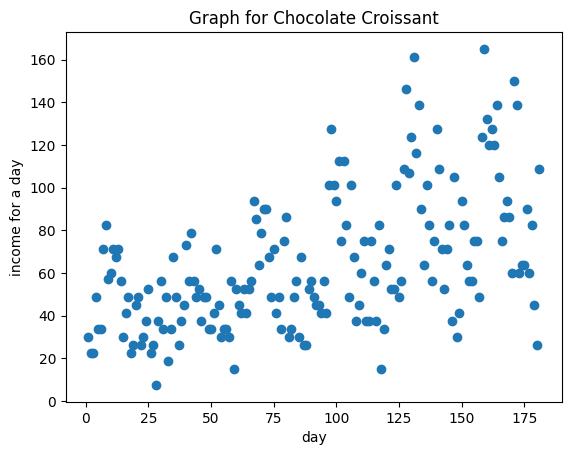

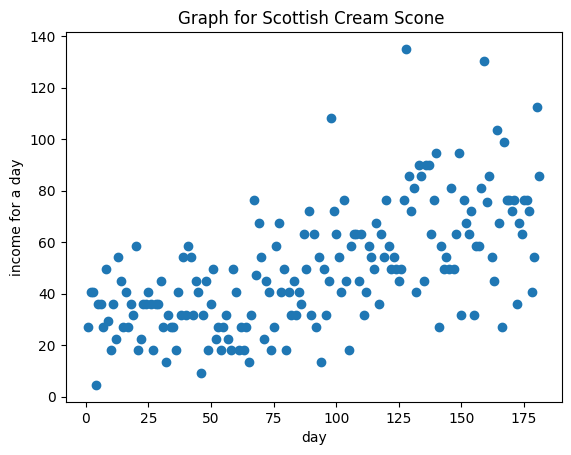

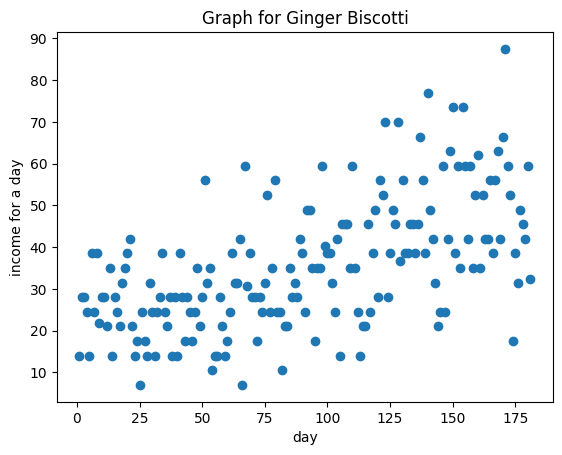

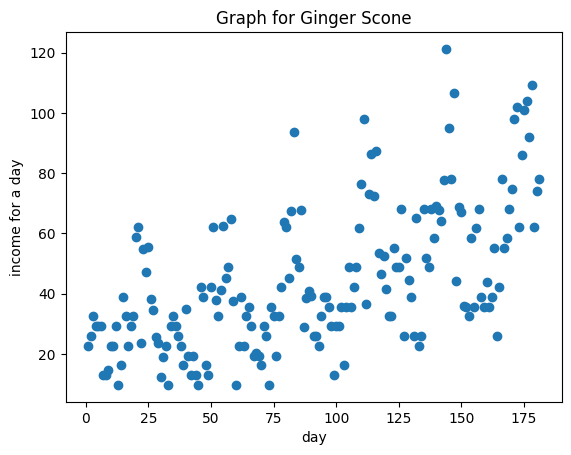

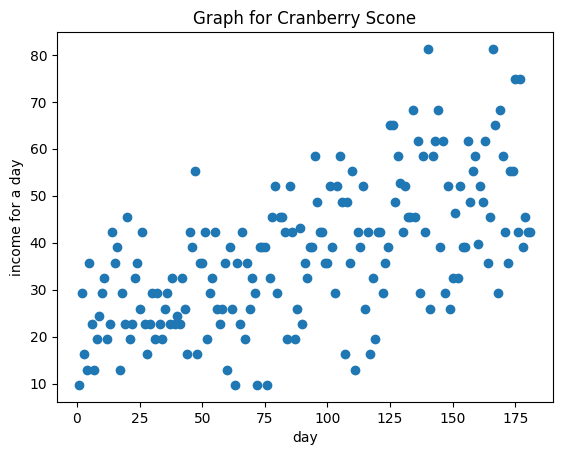

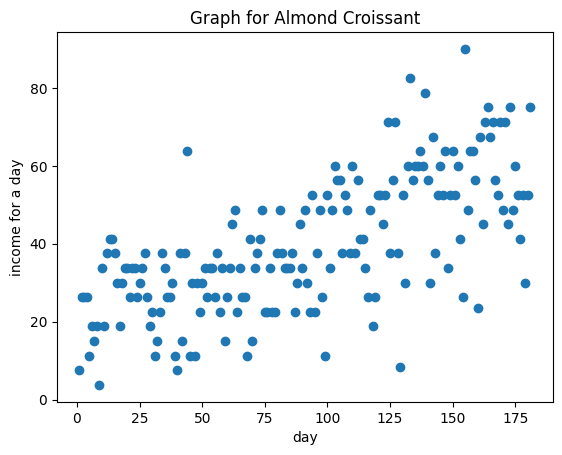

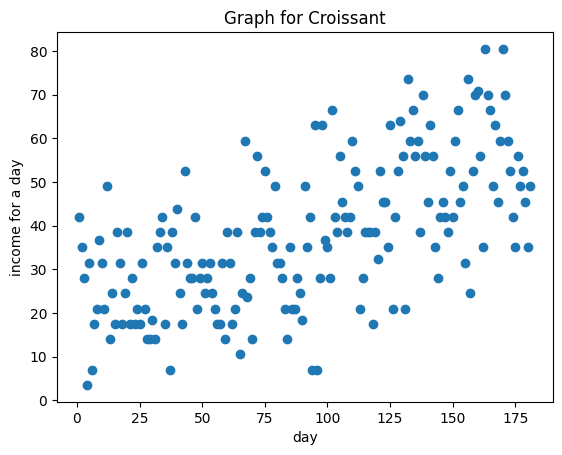

In [84]:
for product in products: 
 df = data[data["product_detail"] == product]
 daily_revenue = df.groupby("day")["revenue"].sum()
 plt.scatter(daily_revenue.index, daily_revenue.values)
 plt.title(f"Graph for {product}")
 plt.xlabel("day")
 plt.ylabel("income for a day")
 plt.show()




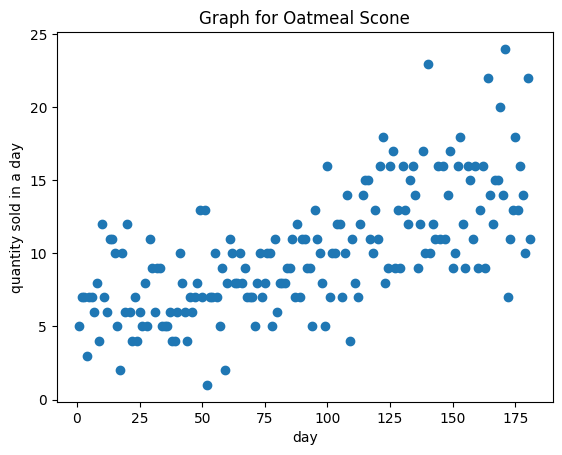

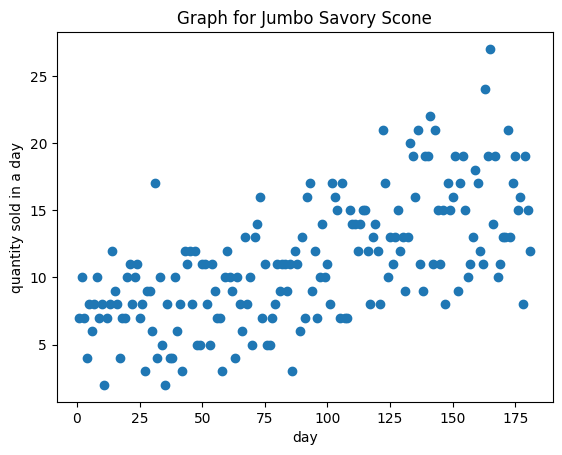

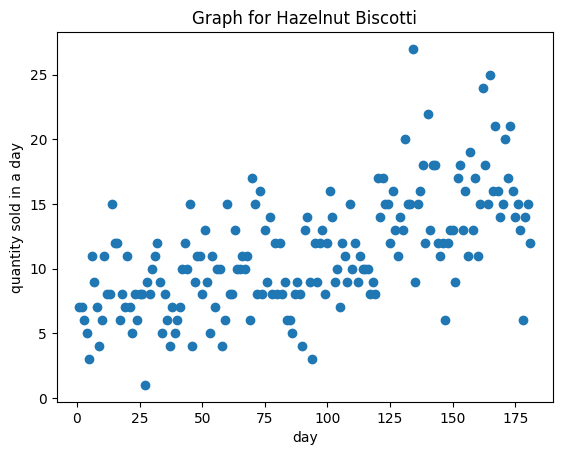

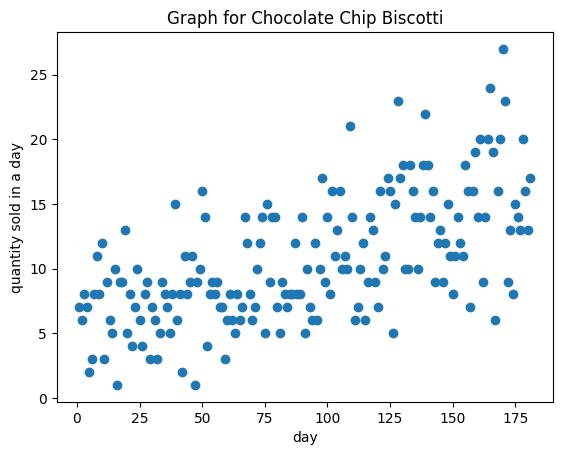

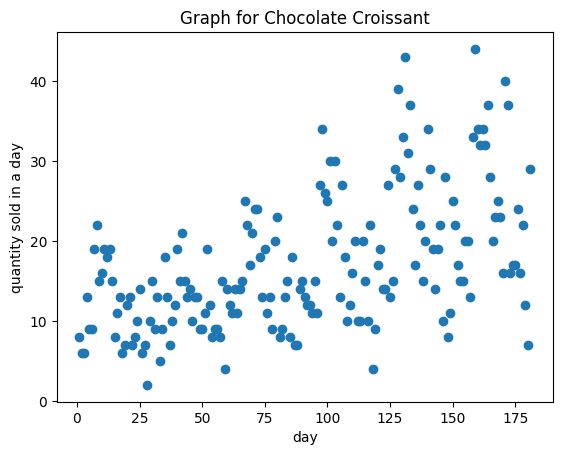

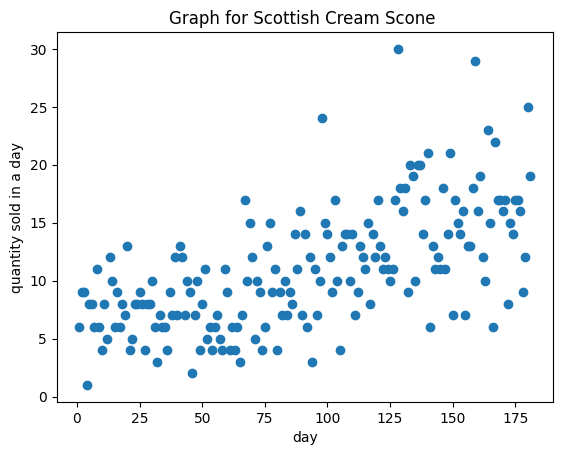

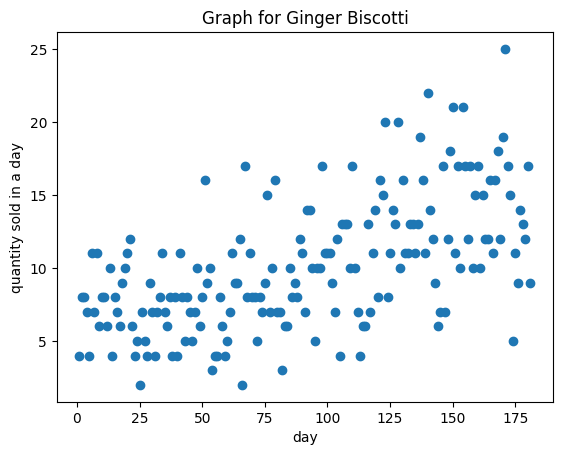

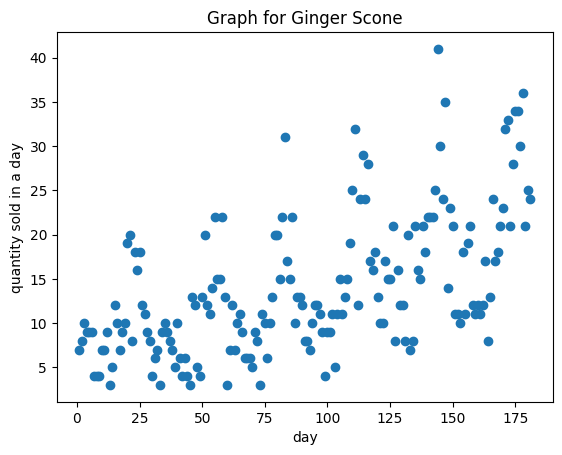

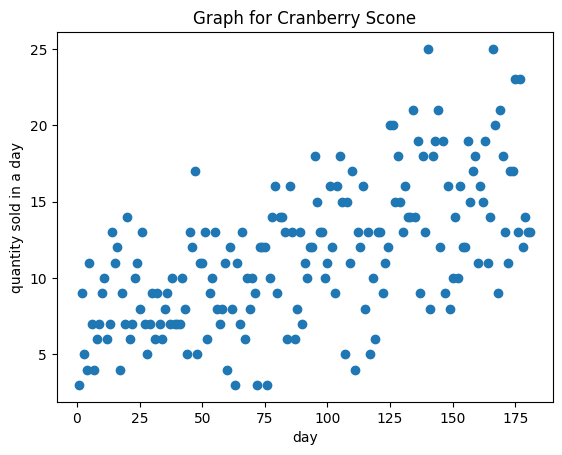

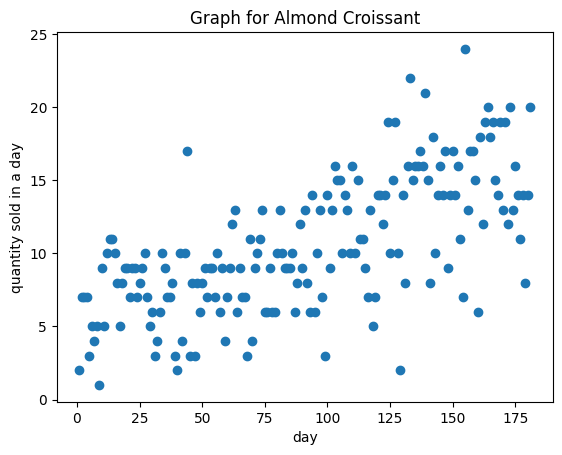

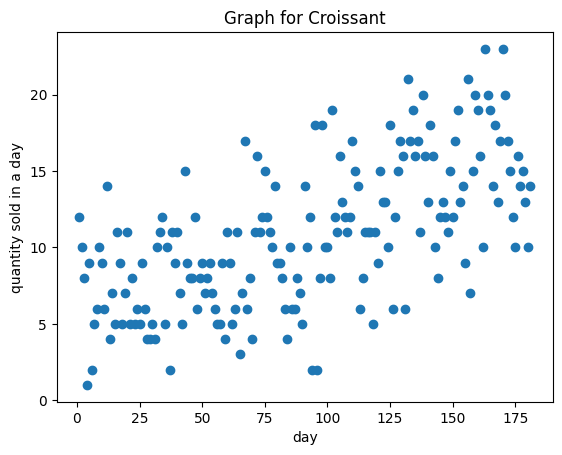

In [85]:
for product in products: 
 df = data[data["product_detail"] == product]
 daily_qty = df.groupby("day")["transaction_qty"].sum()
 plt.scatter(daily_qty.index, daily_qty.values)
 plt.title(f"Graph for {product}")
 plt.xlabel("day")
 plt.ylabel("quantity sold in a day")
 plt.show()

Data is not linearly distributed everywhere. In some cases like for chocolote croissant, there can be seen heteroscedasticity, for that reason the tree based algorithm might be applied.

In [86]:
for product in products: 
 temp = data[data["product_detail"] == product]
 temp_cleaned = temp.drop(columns=[
    'transaction_qty',
    'unit_price',
    'product_category',
    'product_type',
    'product_detail',
    'revenue',
    'part_of_day_lunch',
    'part_of_day_morning'
 ])
 revenue_per_day = temp.groupby("day")["revenue"].sum().reset_index()
 revenue_per_day = revenue_per_day.rename(columns={"revenue": "revenue_per_day"})
 temp_cleaned = temp_cleaned.drop_duplicates(subset="day")
 temp_daily = pd.merge(revenue_per_day, temp_cleaned, on="day")
 temp_daily.to_csv(f"{product}.csv", index=False)

Lets also examine data distribution by a product_type column

In [87]:
types = []
for i in data["product_type"].unique():
    types.append(i)

print(types)

['Scone', 'Biscotti', 'Pastry']


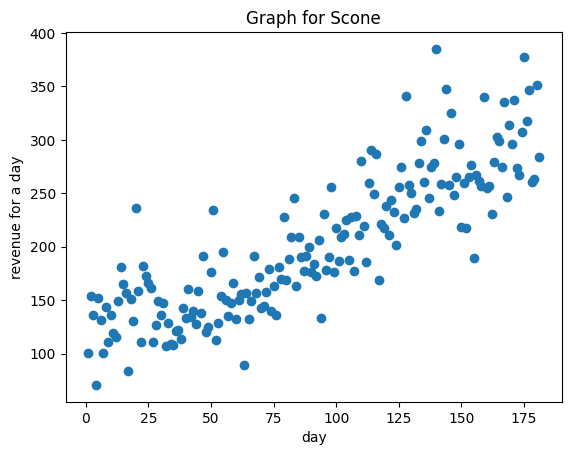

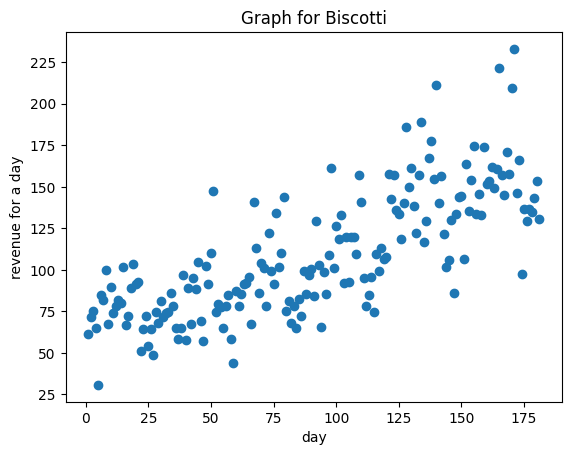

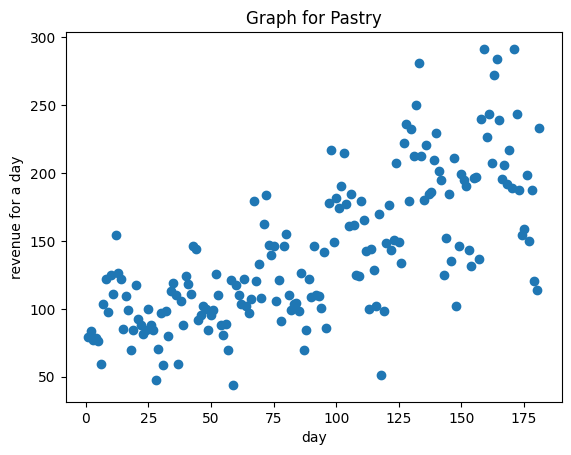

In [88]:
for i in types: # i is used here, because its not allowed to write: for type in types, as type have a meaning 
 df = data[data["product_type"] == i] #in python language
 daily_revenue = df.groupby("day")["revenue"].sum()
 plt.scatter(daily_revenue.index, daily_revenue.values)
 plt.title(f"Graph for {i}")
 plt.xlabel("day")
 plt.ylabel("revenue for a day")
 plt.show()

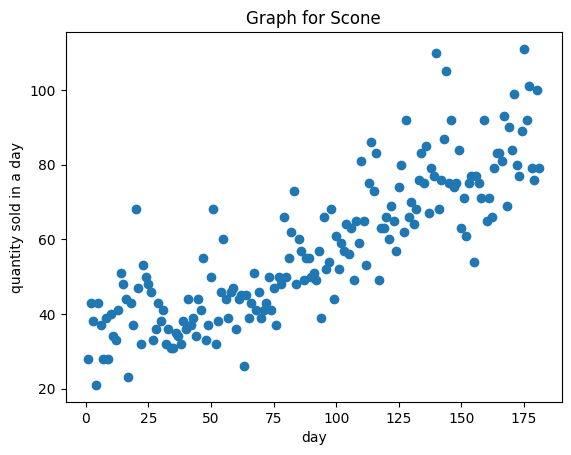

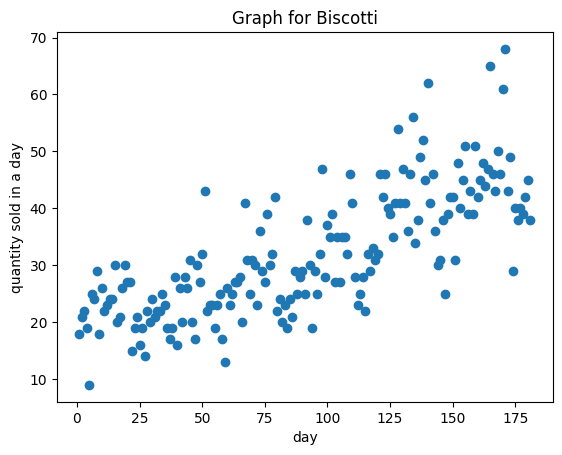

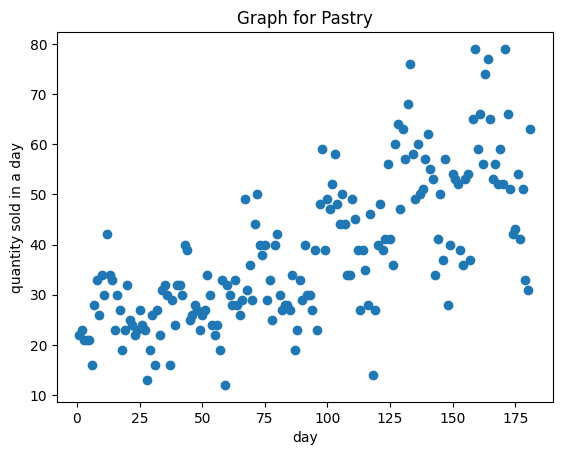

In [89]:
for i in types: 
 df = data[data["product_type"] == i]
 daily_qty = df.groupby("day")["transaction_qty"].sum()
 plt.scatter(daily_qty.index, daily_qty.values)
 plt.title(f"Graph for {i}")
 plt.xlabel("day")
 plt.ylabel("quantity sold in a day")
 plt.show()

Here a more clear and linear trend can be seen 

In [90]:
for i in types: 
 temp = data[data["product_type"] == i]
 temp_cleaned = temp.drop(columns=[
    'transaction_qty',
    'unit_price',
    'product_category',
    'product_type',
    'product_detail',
    'revenue',
    'part_of_day_lunch',
    'part_of_day_morning'
 ])
 revenue_per_day = temp.groupby("day")["revenue"].sum().reset_index()
 revenue_per_day = revenue_per_day.rename(columns={"revenue": "revenue_per_day"})
 temp_cleaned = temp_cleaned.drop_duplicates(subset="day")
 temp_daily = pd.merge(revenue_per_day, temp_cleaned, on="day")
 temp_daily.to_csv(f"{i}.csv", index=False)